In [1]:
%matplotlib inline
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("paper")
sns.set(color_codes=True)

In [3]:
def save_fig(filename, file_format='pdf'):
    plt.tight_layout()
    plt.savefig("assets/{}.{}".format(filename, file_format), format=file_format, dpi=1000)

In [4]:
def get_values(event_path, key_names=[]):
    data = {'step': []}
    if len(key_names) < 1:
        return data
    
    for k in key_names:
        data.update({k: []})
    print(event_path)
    try:
        for i, e in enumerate(tf.train.summary_iterator(event_path)):
            data['step'].append(e.step)
            for v in e.summary.value:
                for k in key_names:
                    if v.tag == k:
                        data[k].append(v.simple_value)
    except:
        pass
    return data

In [5]:
def plot(data, name, key, key_label):
    x = np.array(data['step'])
    y = np.array(data[key])
    n = len(x)
    avg_step = 10
    print(n)
    n = 1000
    x = x[:(n // avg_step - 1) * avg_step].reshape(-1, avg_step)
    y = y[:(n // avg_step - 1) * avg_step].reshape(-1, avg_step)
    avg_x, avg_y = np.mean(x, axis=1), np.mean(y, axis=1)
    plt.plot(avg_x, avg_y, label=name)
    plt.xlabel('update')
    plt.ylabel(key_label)

In [6]:
# event_folder = "/home/lywoon/DnC-RL-Tensorflow/log/"
event_paths = [
    ('DnC-w-norm', 'log_0417/JacoPick-v1_dnc_0412_env_norm_pen_1e4/events.out.tfevents.1523599610.lim-b'), 
    ('DnC-wo-norm', 'log_0417/JacoPick-v1_dnc_0413_no_norm_pen_1e4/events.out.tfevents.1523648903.lim-b'),
    ('TRPO-w-norm', 'log_0417/JacoPick-v1_trpo_0412_env_norm/events.out.tfevents.1523583898.lim-b'),
    ('TRPO-wo-norm', 'log_0417/JacoPick-v1_trpo_0413_no_norm_pen_1e4/events.out.tfevents.1523648938.lim-b')
]
keys = ["Step"]
for i in range(4):
    keys.append("local_%d_1/reward_1" % i)
    keys.append("local_%d_1/success_1" % i)
events = [(name, get_values(path, keys)) for name, path in event_paths]

log_0417/JacoPick-v1_dnc_0412_env_norm_pen_1e4/events.out.tfevents.1523599610.lim-b
log_0417/JacoPick-v1_dnc_0413_no_norm_pen_1e4/events.out.tfevents.1523648903.lim-b
log_0417/JacoPick-v1_trpo_0412_env_norm/events.out.tfevents.1523583898.lim-b
log_0417/JacoPick-v1_trpo_0413_no_norm_pen_1e4/events.out.tfevents.1523648938.lim-b


In [8]:
for name, event in events:
    if 'dnc' in name:
        reward_values = []
        success_values = []
        for i in range(4):
            key = "local_%d_1/reward_1" % i
            reward_values.append(np.array(event[key][:1000]))
            key = "local_%d_1/success_1" % i
            success_values.append(np.array(event[key][:1000]))
        event['reward'] = np.mean(reward_values, axis=0)
        event['success'] = np.mean(success_values, axis=0)
    else:
        key = "local_0_1/reward_1"
        event['reward'] = np.array(event[key][:1000])
        key = "local_0_1/success_1"
        event['success'] = np.array(event[key][:1000])
    print(event['reward'][0:10])
    print(event['success'][0:10])

[-0.07279602 -0.04536625 -0.04722776 -0.09131403 -0.09081133 -0.00527093
 -0.0882818  -0.03077287 -0.08862901 -0.08948503]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.0903343  -0.08998203 -0.0897931  -0.0901554  -0.03145692 -0.08936751
 -0.08815156 -0.08821269 -0.04782425 -0.08741082]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.08640202 -0.08094074 -0.08603065 -0.09004466 -0.08936062 -0.07604523
 -0.0256011  -0.07438014 -0.08406284 -0.07772627]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.09124446 -0.09074748 -0.08158173 -0.07699353 -0.05267288 -0.07241873
 -0.08445137 -0.06387232 -0.06530138 -0.0208244 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


DnC-w-norm
5682
DnC-wo-norm
4804
TRPO-w-norm
2050
TRPO-wo-norm
5013


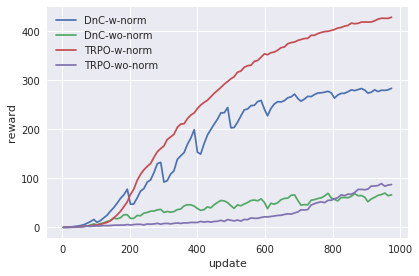

In [9]:
fig = plt.figure()
for name, event in events:
    print(name)
    plot(event, name, 'reward', 'reward')
plt.legend(loc=0)

save_fig('reward', 'png')
plt.show()
plt.close()

DnC-w-norm
5682
DnC-wo-norm
4804
TRPO-w-norm
2050
TRPO-wo-norm
5013


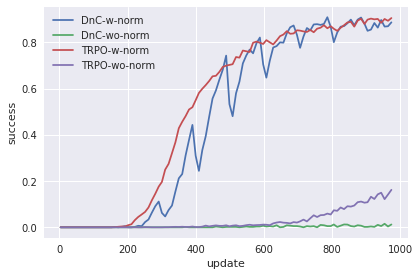

In [10]:
fig = plt.figure()
for name, event in events:
    print(name)
    plot(event, name, 'success', 'success')
plt.legend(loc=0)

save_fig('success', 'png')
plt.show()
plt.close()